load 30m poloniex data

In [1]:
%%capture
cd ..

In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
import time
dfs=[]
for infile in glob.glob('data/china_stock/*.csv'):
    df = pd.read_csv(infile, parse_dates=['date'])
#     print(df)
    df['timestamp'] = pd.to_datetime(df['date'], unit='s')
    
    del df['date']
    df.rename(columns={'timestamp':'date'}, inplace=True)
    # date
    df.index=pd.to_datetime(df.date)
#     print(df['date'])
    del df['date']
    # 
    df = df[['close','high','low','open']]
#     df = df[['close','high','low','open','zturnover','zPB','zPE']] #PB=Price to Book ratio, PE=Price to Earning ratio
#     df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# print(dfs)

In [5]:
dfs.sort(key=lambda x:x.name, reverse=False)
[(df.name,df.index[0]) for df in dfs]

[('CN000031.SZ', Timestamp('1993-10-08 00:00:00')),
 ('CN000709.SZ', Timestamp('1997-04-16 00:00:00')),
 ('CN000785.SZ', Timestamp('1997-07-11 00:00:00')),
 ('CN000825.SZ', Timestamp('1998-10-21 00:00:00')),
 ('CN000898.SZ', Timestamp('1997-12-25 00:00:00')),
 ('CN000959.SZ', Timestamp('1999-12-16 00:00:00')),
 ('CN600022.SH', Timestamp('2004-06-29 00:00:00')),
 ('CN600481.SH', Timestamp('2003-04-22 00:00:00')),
 ('CN600808.SH', Timestamp('1994-01-06 00:00:00')),
 ('CN601991.SH', Timestamp('2006-12-20 00:00:00'))]

In [6]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)

In [7]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-08-15')]
# dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-08-09')]

# also only ones that are in BTC
# dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
# print([str(min(df.index)) for df in dfs1])

In [8]:
# # something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
# blacklist = ['DOGEBTC', 'XRPBTC']
# dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [9]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 10 to 10


In [10]:
# # reindex
# mi = dfs1[0].index.copy()
# for i in range(len(dfs1)):
#     name = dfs1[i].name
#     dfs[i]=dfs1[i].reindex(mi, method='pad')
#     dfs[i][np.isnan(dfs[i])]=0
#     dfs[i].name = name

In [11]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair       CN000031.SZ                         CN000709.SZ                    \
Price            close    high     low    open       close  high   low  open   
date                                                                           
1993-10-08      0.7952  0.8293  0.7918  0.8191         NaN   NaN   NaN   NaN   
1993-10-11      0.7952  0.8293  0.7918  0.8191         NaN   NaN   NaN   NaN   
1993-10-12      0.7645  0.7713  0.7508  0.7542         NaN   NaN   NaN   NaN   
1993-10-13      0.7371  0.7679  0.7371  0.7645         NaN   NaN   NaN   NaN   
1993-10-14      0.7371  0.7371  0.7167  0.7303         NaN   NaN   NaN   NaN   
...                ...     ...     ...     ...         ...   ...   ...   ...   
2024-09-23      2.5200  2.5500  2.4600  2.4900        1.73  1.74  1.70  1.70   
2024-09-24      2.6100  2.6400  2.5300  2.5300        1.82  1.82  1.74  1.74   
2024-09-25      2.6600  2.7900  2.6400  2.6500        1.87  1.92  1.85  1.85   
2024-09-26      2.9000  2.9100  2.6400  2.6500        1.97  1.97  1.85  1.85   
2024-09-27      3.0500  3.0800  2.9100  2.9600        2.02  2.04  1.97  2.00   

Pair       CN000785.SZ        ... CN600481.SH       CN600808.SH              \
Price            close  high  ...         low  open       close  high   low   
date                          ...                                             
1993-10-08         NaN   NaN  ...         NaN   NaN         NaN   NaN   NaN   
1993-10-11         NaN   NaN  ...         NaN   NaN         NaN   NaN   NaN   
1993-10-12         NaN   NaN  ...         NaN   NaN         NaN   NaN   NaN   
1993-10-13         NaN   NaN  ...         NaN   NaN         NaN   NaN   NaN   
1993-10-14         NaN   NaN  ...         NaN   NaN         NaN   NaN   NaN   
...                ...   ...  ...         ...   ...         ...   ...   ...   
2024-09-23        2.29  2.30  ...        3.46  3.50        1.85  1.85  1.82   
2024-09-24        2.44  2.44  ...        3.52  3.52        1.97  1.97  1.84   
2024-09-25        2.47  2.55  ...        3.80  3.80        2.04  2.10  1.98   
2024-09-26        2.63  2.63  ...        3.78  3.80        2.17  2.17  2.02   
2024-09-27        2.72  2.77  ...        4.08  4.08        2.18  2.25  2.12   

Pair             CN601991.SH                    
Price       open       close  high   low  open  
date                                            
1993-10-08   NaN         NaN   NaN   NaN   NaN  
1993-10-11   NaN         NaN   NaN   NaN   NaN  
1993-10-12   NaN         NaN   NaN   NaN   NaN  
1993-10-13   NaN         NaN   NaN   NaN   NaN  
1993-10-14   NaN         NaN   NaN   NaN   NaN  
...          ...         ...   ...   ...   ...  
2024-09-23  1.83        2.53  2.55  2.45  2.46  
2024-09-24  1.85        2.61  2.61  2.53  2.54  
2024-09-25  1.99        2.62  2.71  2.60  2.64  
2024-09-26  2.03        2.68  2.68  2.59  2.62  
2024-09-27  2.19        2.76  2.76  2.66  2.70  

[7535 rows x 40 columns]

In [12]:
# crop to when they all exist
print('cropped from', len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
print('to',len(df))

cropped from 7535
to 4320


In [13]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
df.replace('--', 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
# df

In [14]:
# check stats
df.describe()

Pair   CN000031.SZ                                         CN000709.SZ  \
Price        close         high          low         open        close   
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean      6.234194     6.367099     6.105690     6.225361     3.179184   
std       3.152455     3.269510     3.037981     3.136453     1.823685   
min       2.240000     2.300000     2.210000     2.230000     1.382100   
25%       3.780000     3.843450     3.720000     3.780000     2.153500   
50%       5.254550     5.341700     5.164050     5.249650     2.559100   
75%       7.579000     7.579000     7.579000     7.579000     3.475500   
max      21.742399    22.990499    20.438000    21.160601    13.364300   

Pair                                          CN000785.SZ               ...  \
Price         high          low         open        close         high  ...   
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000  ...   
mean      3.235677     3.120109     3.175473     6.958093     7.083856  ...   
std       1.883784     1.754470     1.820680     2.595110     2.659445  ...   
min       1.398100     1.374000     1.374000     2.230800     2.290000  ...   
25%       2.179500     2.133000     2.154600     4.927175     5.005900  ...   
50%       2.598700     2.528200     2.560950     6.865500     6.982450  ...   
75%       3.532000     3.419725     3.467500     8.870825     9.030225  ...   
max      13.831900    12.859300    13.691600    19.433901    19.969200  ...   

Pair   CN600481.SH               CN600808.SH                            \
Price          low         open        close         high          low   
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean      5.144253     5.248229     2.811468     2.862838     2.755644   
std       3.148051     3.220051     1.225314     1.267705     1.178415   
min       0.895800     0.918900     1.117400     1.124700     1.095500   
25%       3.021600     3.075600     2.161800     2.191000     2.129225   
50%       4.170300     4.250000     2.606700     2.641500     2.564500   
75%       6.046850     6.194325     3.133150     3.177000     3.079300   
max      18.214500    18.477200    10.506900    10.750400    10.054600   

Pair                CN601991.SH                                         
Price         open        close         high          low         open  
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000  
mean      2.808562     4.269621     4.346584     4.187768     4.267073  
std       1.224986     2.466405     2.544044     2.384887     2.467040  
min       1.117400     1.901700     1.920400     1.799200     1.799200  
25%       2.154500     2.839425     2.875500     2.809700     2.838900  
50%       2.601500     3.480400     3.522750     3.444800     3.485250  
75%       3.127800     4.815125     4.906900     4.729400     4.811475  
max      10.506900    18.123699    18.886999    17.454800    18.116400  

[8 rows x 40 columns]

In [15]:
assert np.isfinite(df.values).all()

In [16]:
# split
test_split=0.09
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 387 train#: 3933 test_frac: 0.08958333333333333 cutoff_time: 2023-02-27 00:00:00


In [17]:
# save
df_train.to_hdf('data/chinaStock_1d_vol.hf',key='train', mode='w', append=False)
df_test.to_hdf('data/chinaStock_1d_vol.hf',key='test', mode='a', append=False)
df_train

Pair       CN000031.SZ                         CN000709.SZ                  \
Price            close    high     low    open       close    high     low   
date                                                                         
2006-12-21      3.4449  3.5835  3.4231  3.4814      2.3318  2.4137  2.3136   
2006-12-22      3.3429  3.4449  3.3210  3.3903      2.2999  2.3500  2.2543   
2006-12-25      3.4048  3.5361  3.3356  3.3356      2.3272  2.3318  2.2908   
2006-12-26      3.3465  3.4559  3.3173  3.4121      2.3545  2.3819  2.3136   
2006-12-27      3.3830  3.3903  3.3137  3.3465      2.4365  2.5048  2.3591   
...                ...     ...     ...     ...         ...     ...     ...   
2023-02-21      3.7500  3.8600  3.7400  3.8200      2.4434  2.4626  2.3664   
2023-02-22      3.7600  3.7700  3.7000  3.7400      2.4434  2.4530  2.4145   
2023-02-23      3.7600  3.7900  3.7300  3.7900      2.4434  2.4915  2.4242   
2023-02-24      3.7300  3.7700  3.6800  3.7700      2.4530  2.4626  2.4242   
2023-02-27      3.7000  3.7800  3.6900  3.7800      2.4338  2.4723  2.4145   

Pair               CN000785.SZ          ... CN600481.SH          CN600808.SH  \
Price         open       close    high  ...         low     open       close   
date                                    ...                                    
2006-12-21  2.3955      2.9818  3.0913  ...      0.9552   0.9974      2.7845   
2006-12-22  2.3227      2.9818  3.0071  ...      0.9313   0.9524      2.7026   
2006-12-25  2.2999      2.9734  3.0408  ...      0.9412   0.9426      2.7640   
2006-12-26  2.3318      2.9060  2.9987  ...      0.9426   0.9721      2.9347   
2006-12-27  2.3682      2.8808  2.9229  ...      0.9552   0.9651      3.0234   
...            ...         ...     ...  ...         ...      ...         ...   
2023-02-21  2.3761      4.0493  4.0586  ...     11.6022  11.6678      3.0562   
2023-02-22  2.4338      4.0308  4.0493  ...     11.9867  12.1931      3.0562   
2023-02-23  2.4530      4.0771  4.1420  ...     12.0148  12.0242      3.0463   
2023-02-24  2.4434      4.0771  4.0957  ...     11.9586  12.1743      3.0463   
2023-02-27  2.4434      4.0586  4.1142  ...     11.8929  11.9586      3.0562   

Pair                               CN601991.SH                          
Price         high     low    open       close    high     low    open  
date                                                                    
2006-12-21  2.9210  2.7709  2.9210      3.8477  4.0392  3.8296  4.0392  
2006-12-22  2.7913  2.6548  2.7640      3.6418  3.7899  3.5767  3.7899  
2006-12-25  2.7982  2.7026  2.7026      3.6707  3.6779  3.5767  3.6129  
2006-12-26  2.9347  2.7845  2.7845      3.6490  3.7610  3.6237  3.6634  
2006-12-27  3.1121  2.9483  2.9688      3.8224  3.8260  3.6129  3.6129  
...            ...     ...     ...         ...     ...     ...     ...  
2023-02-21  3.0661  2.9669  2.9768      2.9276  2.9375  2.8882  2.9079  
2023-02-22  3.0761  3.0165  3.0364      2.9178  2.9375  2.8981  2.9178  
2023-02-23  3.0860  3.0264  3.0761      2.8882  2.9178  2.8685  2.9079  
2023-02-24  3.0562  3.0165  3.0364      2.8784  2.9079  2.8586  2.8784  
2023-02-27  3.1158  3.0364  3.0463      2.8586  2.8981  2.8488  2.8586  

[3933 rows x 40 columns]

In [18]:
df_test

Pair       CN000031.SZ                   CN000709.SZ                          \
Price            close  high   low  open       close    high     low    open   
date                                                                           
2023-02-28        3.74  3.74  3.68  3.69      2.4242  2.4338  2.3953  2.4338   
2023-03-01        3.77  3.77  3.74  3.74      2.4338  2.4530  2.4145  2.4242   
2023-03-02        3.78  3.80  3.74  3.77      2.4530  2.4626  2.4145  2.4242   
2023-03-03        3.79  3.80  3.76  3.76      2.4626  2.4626  2.4338  2.4530   
2023-03-06        3.75  3.80  3.72  3.80      2.4434  2.4819  2.4338  2.4626   
...                ...   ...   ...   ...         ...     ...     ...     ...   
2024-09-23        2.52  2.55  2.46  2.49      1.7300  1.7400  1.7000  1.7000   
2024-09-24        2.61  2.64  2.53  2.53      1.8200  1.8200  1.7400  1.7400   
2024-09-25        2.66  2.79  2.64  2.65      1.8700  1.9200  1.8500  1.8500   
2024-09-26        2.90  2.91  2.64  2.65      1.9700  1.9700  1.8500  1.8500   
2024-09-27        3.05  3.08  2.91  2.96      2.0200  2.0400  1.9700  2.0000   

Pair       CN000785.SZ          ... CN600481.SH          CN600808.SH          \
Price            close    high  ...         low     open       close    high   
date                            ...                                            
2023-02-28      4.1605  4.1791  ...     11.7616  11.9586      3.0661  3.0761   
2023-03-01      4.1235  4.1791  ...     11.7429  11.8929      3.0661  3.0860   
2023-03-02      4.1049  4.1327  ...     11.7616  11.8742      3.0959  3.1058   
2023-03-03      4.1420  4.1605  ...     11.7616  11.7710      3.1158  3.1257   
2023-03-06      4.1605  4.1791  ...     12.2306  12.2306      3.0959  3.1455   
...                ...     ...  ...         ...      ...         ...     ...   
2024-09-23      2.2900  2.3000  ...      3.4600   3.5000      1.8500  1.8500   
2024-09-24      2.4400  2.4400  ...      3.5200   3.5200      1.9700  1.9700   
2024-09-25      2.4700  2.5500  ...      3.8000   3.8000      2.0400  2.1000   
2024-09-26      2.6300  2.6300  ...      3.7800   3.8000      2.1700  2.1700   
2024-09-27      2.7200  2.7700  ...      4.0800   4.0800      2.1800  2.2500   

Pair                       CN601991.SH                          
Price          low    open       close    high     low    open  
date                                                            
2023-02-28  3.0264  3.0562      2.9276  2.9276  2.8586  2.8685  
2023-03-01  3.0661  3.0860      2.9079  2.9375  2.8882  2.9276  
2023-03-02  3.0364  3.0661      2.9178  2.9474  2.8784  2.8882  
2023-03-03  3.0761  3.0959      2.9966  3.0065  2.9079  2.9178  
2023-03-06  3.0860  3.1356      3.0755  3.1051  2.9868  2.9966  
...            ...     ...         ...     ...     ...     ...  
2024-09-23  1.8200  1.8300      2.5300  2.5500  2.4500  2.4600  
2024-09-24  1.8400  1.8500      2.6100  2.6100  2.5300  2.5400  
2024-09-25  1.9800  1.9900      2.6200  2.7100  2.6000  2.6400  
2024-09-26  2.0200  2.0300      2.6800  2.6800  2.5900  2.6200  
2024-09-27  2.1200  2.1900      2.7600  2.7600  2.6600  2.7000  

[387 rows x 40 columns]

In [19]:
# # drop cols and update multiindex
# df_train1 = df_train.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_train1.columns = pd.MultiIndex.from_tuples(df_train1.columns.tolist(), names=df_train1.columns.names) # update index to remove dropped cols
# df_train1 = df_train1.sort_index(axis=1)

# df_test1 = df_test.drop(['volume','quoteVolume'],axis=1,level='Price')
# df_test1.columns = pd.MultiIndex.from_tuples(df_test1.columns.tolist(), names=df_test1.columns.names)
# df_test1 = df_test1.sort_index(axis=1)
# df_test1

In [20]:
# df_train1 = df_train1.sort_index(axis=1)

In [21]:
# # save
# df_train1.to_hdf('data/chinese_1d.hf',key='train', mode='w', append=False)
# df_test1.to_hdf('data/chinese_1d.hf',key='test', mode='a', append=False)

In [22]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs1):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

In [23]:
# # View one day, normalized
# data_window = df.copy()
# open = data_window.xs('open', axis=1, level='Price')
# data_window = data_window.divide(open.iloc[-1], level='Pair')
# data_window = data_window.drop('open', axis=1, level='Price')
# data_window.xs('close', axis=1, level='Price').plot()

In [24]:
# # view timeseries
# plt.figure(figsize=(15,16))
# for i, d in enumerate(dfs):
#     name = d.name
#     x=d.dropna().index
#     y=[-i]*len(x)
#     plt.scatter(x,y,label=name[:20], s=1)
# plt.legend()

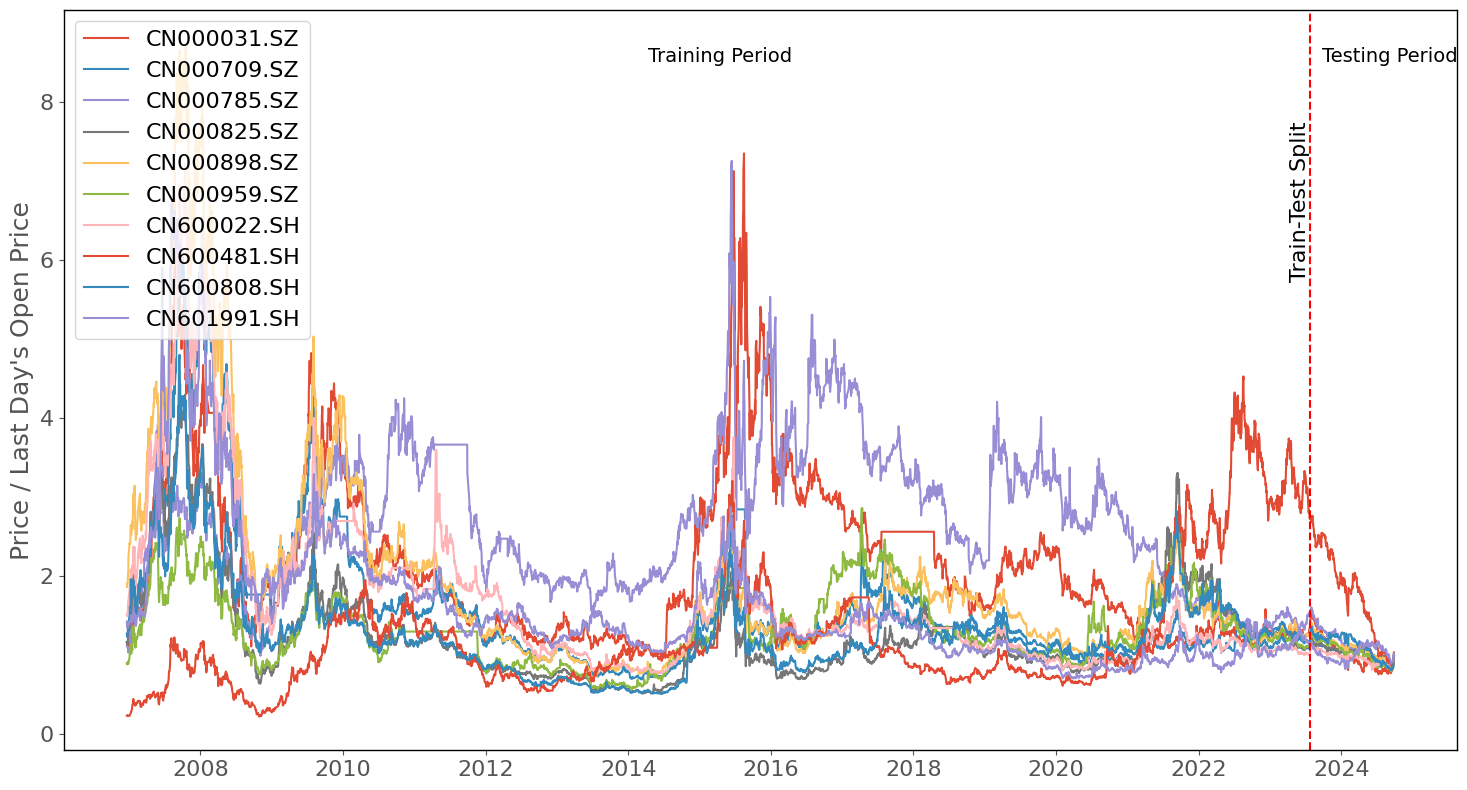

In [25]:
# 设置字体大小参数
LABEL_FONT_SIZE = 14  # 区间标签的字体大小
LEGEND_FONT_SIZE = 16 # 图例的字体大小
SPLIT_LABEL_FONT_SIZE = 16  # 分割线标签的字体大小
AXIS_LABEL_FONT_SIZE = 18  # 轴标签的字体大小
TICK_FONT_SIZE = 16  # 刻度标签的字体大小

# 准备归一化数据
data_window = df.copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')

# 创建图形
fig, ax = plt.subplots(figsize=(15, 8))
plt.style.use('default')  # 使用默认样式
plt.grid(False)


# 设置背景颜色
ax.set_facecolor('white')  # 设置坐标轴区域背景为白色
fig.set_facecolor('white')  # 设置整个图形背景为白色
fig.patch.set_alpha(0.0)   # 设置图形背景透明度为0
ax.patch.set_alpha(0.0)    # 设置坐标轴区域背景透明度为0

# 添加边框
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# 可以设置边框颜色（可选）
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# 绘制归一化后的收盘价走势
data_window.xs('close', axis=1, level='Price').plot(ax=ax)

# 添加训练集-测试集分割线
split_date = pd.Timestamp('2023-07-26')  # 注意：这里设置分割的日期 (Note: Set the split date here)
ax.axvline(x=split_date, color='red', linestyle='--')

# 获取数据的时间索引并确保是排序的
time_index = data_window.index.sort_values()

# 获取训练集和测试集的日期范围
train_dates = time_index[time_index < split_date]
test_dates = time_index[time_index >= split_date]

# 计算训练集中点位置
train_period_center = train_dates[len(train_dates)//2]

# 计算Testing Period的位置
test_period_start = test_dates[0]
test_period_end = test_dates[-1]
# 将Testing Period位置设置在测试集中间偏右的位置
test_period_center = test_period_start + pd.Timedelta(days=60)  # 增加到60天，使标签更靠右

# 获取y轴范围
y_min, y_max = ax.get_ylim()
y_text_position = y_max - (y_max - y_min) * 0.05  # 将文本位置向下调整5%
split_text_position = y_max - (y_max - y_min) * 0.15  # 将分割线文本位置再向下调整

# 添加文本标注
ax.text(split_date, split_text_position, 'Train-Test Split', 
        rotation=90, verticalalignment='top', horizontalalignment='right',
        fontsize=SPLIT_LABEL_FONT_SIZE)
ax.text(train_period_center, y_text_position, 'Training Period', 
        horizontalalignment='center', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)
ax.text(test_period_center, y_text_position, 'Testing Period', 
        horizontalalignment='left', verticalalignment='top',
        fontsize=LABEL_FONT_SIZE)

# 设置图表标题和标签
# ax.set_title('Normalized Stock Prices with Train-Test Split')
ax.set_xlabel('')
ax.set_ylabel("Price / Last Day's Open Price", fontsize=AXIS_LABEL_FONT_SIZE)  # "Price Normalized by Final Open Price"

# 设置刻度标签字体大小、方向和对齐方式
ax.tick_params(axis='both', labelsize=TICK_FONT_SIZE)

# 获取当前x轴刻度位置和标签
locs, labels = plt.xticks()
# 重新设置标签，调整对齐方式和旋转角度
plt.setp(ax.get_xticklabels(), horizontalalignment='center', rotation=0)  # 添加rotation=0保持水平显示


# 将图例放在图形内左上角，设置字体大小
plt.legend(loc='upper left', fontsize=LEGEND_FONT_SIZE)

# 调整布局
plt.tight_layout()
plt.show()


In [26]:
%%capture
cd data

In [27]:
fig.savefig('./img/taining&testing_periods.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg',
                      transparent=True)